In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import altair as alt
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## File Import

In [2]:
df = pd.read_csv("../data_input/feed_v1.csv", index_col = None)
df = df.drop(columns = 'Unnamed: 0')
df

,Ts,t,HF,Weight,Tr,sheet_name,compound,exp_no
0,40.1741,0,0.483698,100.0000,25.0000,I1-30-1,05-85,3
1,40.1511,1,0.447084,99.9913,25.1667,I1-30-1,05-85,3
2,40.1566,2,0.428202,99.9864,25.3333,I1-30-1,05-85,3
3,40.1877,3,0.414622,99.9841,25.5000,I1-30-1,05-85,3
4,40.2206,4,0.383961,99.9881,25.6667,I1-30-1,05-85,3
...,...,...,...,...,...,...,...,...
41854,506.0690,4646,249.412000,35.8362,500.0000,DAO (1),DAO,1
41855,506.0730,4647,249.411000,35.8377,500.0000,DAO (1),DAO,1
41856,506.0740,4648,249.409000,35.8393,500.0000,DAO (1),DAO,1
41857,506.0710,4649,249.408000,35.8409,500.0000,DAO (1),DAO,1


In [3]:
df.compound.value_counts()

05-85    13953
1-8      13953
DAO      13953
Name: compound, dtype: int64

In [4]:
def test_train_compound(df, product):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        product : tbbpa, caoh2, both
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
    df = df.query('compound == @product')
    X_train, X_test, y_train, y_test = train_test_split(df[["Ts", 't', 'HF', 'Tr']], df["Weight"], test_size=0.2, random_state=7)
    return X_train, X_test, y_train, y_test

In [5]:
df_results = pd.DataFrame({'Model': [],
                           'Compound' : [],
                           'Train Accuracy': [],
                           'Test Accuracy' : []
                           })
df_results

,Model,Compound,Train Accuracy,Test Accuracy


## Summary

In [20]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,05-85,0.950623,0.949445
NaN,Linear Regression,1-8,0.944426,0.943092
NaN,Linear Regression,DAO,0.943814,0.942346
NaN,Partial Least Squares (n=2),05-85,0.898456,0.897495
NaN,Partial Least Squares (n=2),1-8,0.895012,0.893727
NaN,Partial Least Squares (n=2),DAO,0.894597,0.893963
NaN,Partial Least Squares (n=3),05-85,0.945137,0.945039
NaN,Partial Least Squares (n=3),1-8,0.939971,0.939680
NaN,Partial Least Squares (n=3),DAO,0.940255,0.939713
NaN,Random Forest Regression (max_depth = 2),05-85,0.993889,0.993096


## Linear Modelling

In [7]:
def linear_model(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train)
    
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = lr.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_lr_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Linear Regression',
                           'Train Accuracy': lr.score(X_train, y_train),
                           'Test Accuracy' : lr.score(X_test, y_test),
                           'Compound' : product}, index = [None])
    
for i in df.compound.value_counts().index:
    df_results = df_results.append(linear_model(df, i))
    

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9506225750731464
The testing accuracy for the model is  0.9494448382534981
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9444256621162193
The testing accuracy for the model is  0.9430919745706666
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9438141806686735
The testing accuracy for the model is  0.9423458158134066


## PLSR

In [8]:
def pls2(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls2 = PLSRegression(n_components=2).fit(X_train, y_train)
    
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = pls2.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_plsr2_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", pls2.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls2.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=2)',
                           'Train Accuracy': pls2.score(X_train, y_train),
                           'Test Accuracy' : pls2.score(X_test, y_test),
                           'Compound' : i}, index = [None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(pls2(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.8984559531030358
The testing accuracy for the model is  0.8974947590740571
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.895011861666901
The testing accuracy for the model is  0.8937273516451448
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.8945974210759268
The testing accuracy for the model is  0.8939627026817364


In [9]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,05-85,0.950623,0.949445
NaN,Linear Regression,1-8,0.944426,0.943092
NaN,Linear Regression,DAO,0.943814,0.942346
NaN,Partial Least Squares (n=2),05-85,0.898456,0.897495
NaN,Partial Least Squares (n=2),1-8,0.895012,0.893727
NaN,Partial Least Squares (n=2),DAO,0.894597,0.893963


In [10]:
def pls3(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls3 = PLSRegression(n_components=3).fit(X_train, y_train)
    print("The training accuracy for the model is ", pls3.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls3.score(X_test, y_test))
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = pls3.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_plsr3_{}.csv'.format(product))
    
    return pd.DataFrame({'Model': 'Partial Least Squares (n=3)',
                           'Train Accuracy': pls3.score(X_train, y_train),
                           'Test Accuracy' : pls3.score(X_test, y_test),
                           'Compound' : i}, index = [None])
for i in df.compound.value_counts().index:
    df_results = df_results.append(pls3(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9451371826550269
The testing accuracy for the model is  0.9450387011124508
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9399713547510862
The testing accuracy for the model is  0.9396804695461078
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9402551145270681
The testing accuracy for the model is  0.9397125473681954


## Random forest

In [11]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf2 = RandomForestRegressor(random_state=0, max_depth = 2).fit(X_train, y_train)
    
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = rf2.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_rf2_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", rf2.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf2.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 2)',
                           'Train Accuracy': rf2.score(X_train, y_train),
                           'Test Accuracy' : rf2.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.993888508271858
The testing accuracy for the model is  0.9930960789239877
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.993656311886893
The testing accuracy for the model is  0.9927595428077203
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9939347760460212
The testing accuracy for the model is  0.9933294131623256


In [12]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf5 = RandomForestRegressor(random_state=0, max_depth = 5).fit(X_train, y_train)
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = rf5.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_rf5_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf5.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf5.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 5)',
                           'Train Accuracy': rf5.score(X_train, y_train),
                           'Test Accuracy' : rf5.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9998115173971895
The testing accuracy for the model is  0.9997338411486796
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9998865498698165
The testing accuracy for the model is  0.9998684287038005
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9997278542810737
The testing accuracy for the model is  0.9996453292567936


In [13]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf7 = RandomForestRegressor(random_state=0, max_depth = 7).fit(X_train, y_train)
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = rf7.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_rf7_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf7.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf7.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 7)',
                           'Train Accuracy': rf7.score(X_train, y_train),
                           'Test Accuracy' : rf7.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9999634264737982
The testing accuracy for the model is  0.9999290741678912
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9999799610857962
The testing accuracy for the model is  0.9999696652351093
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9998878276740881
The testing accuracy for the model is  0.9998328149289812


In [14]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf10 = RandomForestRegressor(random_state=0, max_depth = 10).fit(X_train, y_train)
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = rf10.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_rf10_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf10.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf10.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 10)',
                           'Train Accuracy': rf10.score(X_train, y_train),
                           'Test Accuracy' : rf10.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9999929400087377
The testing accuracy for the model is  0.9999702596754745
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9999973025907758
The testing accuracy for the model is  0.9999907106854313
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.999955254276367
The testing accuracy for the model is  0.9998912031601551


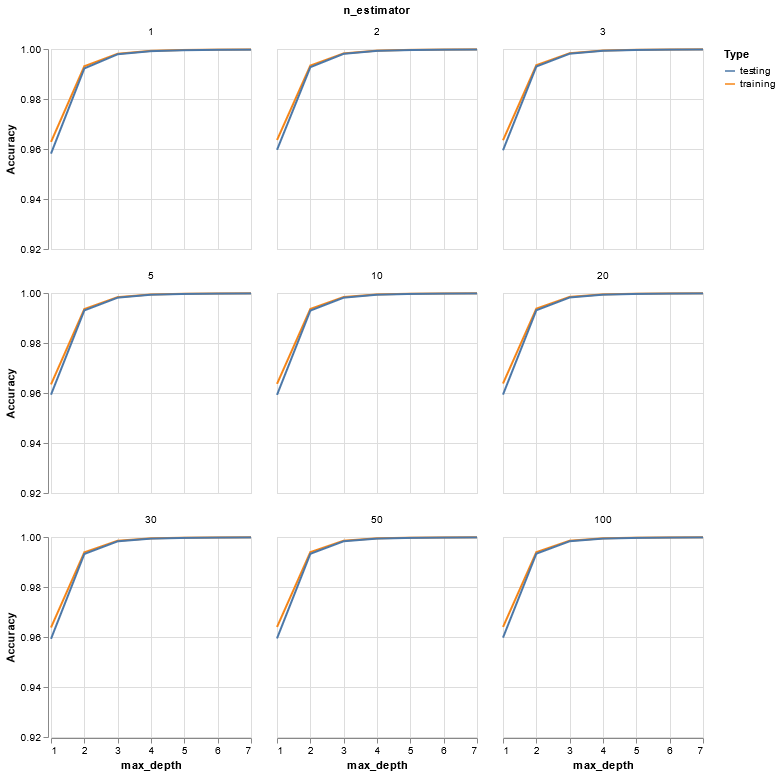

In [15]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(1,8)
X_train, X_test, y_train, y_test = test_train_compound(df, "DAO")
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        rf = RandomForestRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(rf.score(X_train, y_train))
        test_acc.append(rf.score(X_test, y_test))
        #print(j,i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_rf
alt.Chart(df_rf).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.92, 1])),
    alt.Color('Type'),
    alt.Facet('n_estimator')
    ).properties(width = 200, height = 200, columns = 3)

## SVR

In [16]:
def svr_rbf(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = svr_rbf.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_svr_rbf_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'SVR RBF Kernel',
                           'Train Accuracy': svr_rbf.score(X_train, y_train),
                           'Test Accuracy' : svr_rbf.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(svr_rbf(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9611357301948601
The testing accuracy for the model is  0.9598067933800605
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9635729621618572
The testing accuracy for the model is  0.9618123194813584
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.962960830263412
The testing accuracy for the model is  0.9612750830995994


## GBR

In [19]:
def gbr(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    gbr = GradientBoostingRegressor().fit(X_train,y_train)
    
    df_pred = df.query("compound == @product").copy()
    df_pred['predicted_wt'] = gbr.predict(df.query("compound == @product")[['Ts', 't', 'HF', 'Tr']])
    df_pred.to_csv(r'../output/scenario2/prediction_gbr_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", gbr.score(X_train, y_train))
    print("The testing accuracy for the model is ", gbr.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Train Accuracy': gbr.score(X_train, y_train),
                           'Test Accuracy' : gbr.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(gbr(df, i))

The 4 matrices for -- 05-85 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9999157178456488
The testing accuracy for the model is  0.9998568196551681
The 4 matrices for -- 1-8 -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9999792528491638
The testing accuracy for the model is  0.9999679882593967
The 4 matrices for -- DAO -- are of sizes:  (11162, 4) (2791, 4) (11162,) (2791,)
The training accuracy for the model is  0.9998066167583011
The testing accuracy for the model is  0.9997072299165909


In [21]:
df_results.to_csv('../output/scenario2/results_table.csv')